<a href="https://colab.research.google.com/github/JavZon/Takrorlash/blob/main/takror_churn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

url='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/E-Commerce-Dataset.csv'
df=pd.read_csv(url)
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.221492  
std       2.939680           3.654433       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [ ]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

PIE

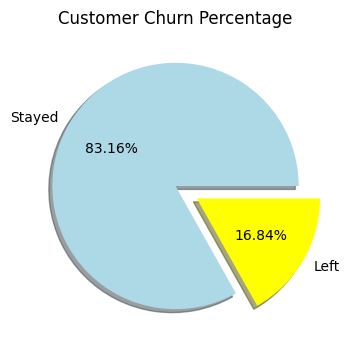

In [ ]:
explode = (0, 0.2)
plt.figure(figsize=(4,4))
plt.pie(df['Churn'].value_counts(), labels=['Stayed', 'Left'],explode=explode,autopct='%1.2f%%',colors=('lightblue','yellow'),shadow=True)
plt.title('Customer Churn Percentage')
plt.show()

In [ ]:
df.head(3)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120

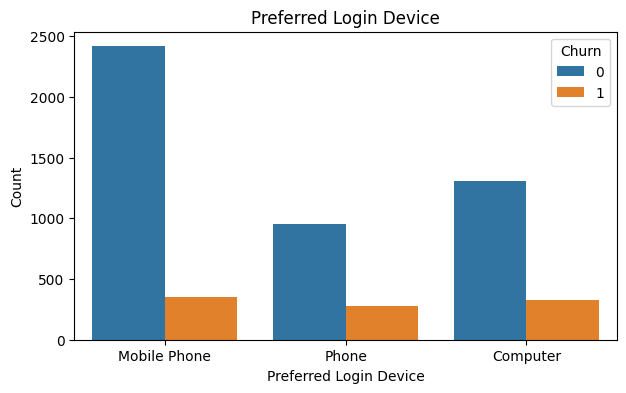

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x='PreferredLoginDevice',data=df, hue='Churn')
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.title('Preferred Login Device')
plt.show()

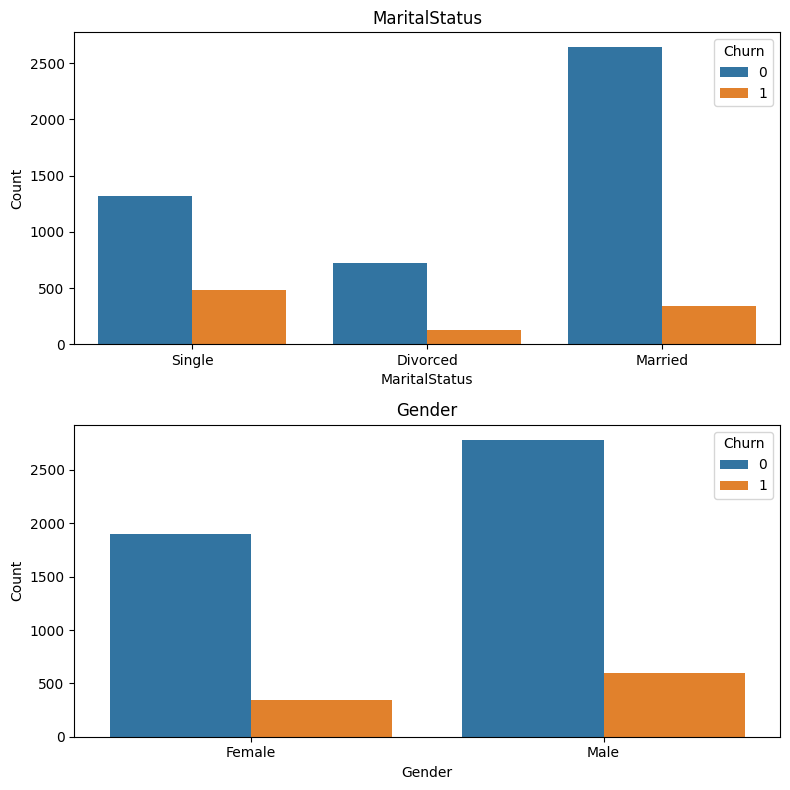

In [ ]:
fig,axes=plt.subplots(2,1, figsize=(8,8))
sns.countplot(x='MaritalStatus',data=df,hue='Churn',ax=axes[0])
axes[0].set_xlabel('MaritalStatus')
axes[0].set_ylabel('Count')
axes[0].set_title('MaritalStatus')

sns.countplot(x='Gender', data=df, hue='Churn',ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender')
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df2=df.drop(columns=['CustomerID','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'])
df2.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0      1     4.0         3              6.0             3.0   
1      1     NaN         1              8.0             3.0   
2      1     NaN         1             30.0             2.0   
3      1     0.0         3             15.0             2.0   
4      1     0.0         1             12.0             NaN   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0         1.0                0.0   
2                         14.0         0.0         1.0                3.0   
3                         23.0         0.0         1.0                3.0   
4                         11.0         1.0         1.0                3.0   

   CashbackAmount  
0             160  
1             121  
2             120  
3             134  
4             130

In [ ]:
df2.corrwith(df2['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154161
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

As we see from the correlation table there are only 4 columns that correlated with 'Churn' column 15% or more. So we drop all other columns.

In [ ]:
cols=['Tenure','Complain','DaySinceLastOrder','CashbackAmount','Gender','MaritalStatus','PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','Churn']
data=df[cols]
data.sample(5)

Tenure  Complain  DaySinceLastOrder  CashbackAmount  Gender  \
1339     0.0         0                0.0             130  Female   
1816    11.0         0                0.0             198  Female   
113      5.0         0                2.0             139  Female   
823      3.0         1                NaN             219  Female   
3185     1.0         0                3.0             155    Male   

     MaritalStatus PreferredLoginDevice PreferredPaymentMode  \
1339        Single                Phone                  UPI   
1816       Married         Mobile Phone          Credit Card   
113       Divorced                Phone           Debit Card   
823       Divorced         Mobile Phone          Credit Card   
3185       Married         Mobile Phone             E wallet   

        PreferedOrderCat  Churn  
1339              Mobile      0  
1816  Laptop & Accessory      0  
113         Mobile Phone      0  
823              Fashion      0  
3185        Mobile Phone      1

In [ ]:
data.isnull().sum()

Tenure                  264
Complain                  0
DaySinceLastOrder       307
CashbackAmount            0
Gender                    0
MaritalStatus             0
PreferredLoginDevice      0
PreferredPaymentMode      0
PreferedOrderCat          0
Churn                     0
dtype: int64

In [ ]:
mean1=data['Tenure'].mean().round()
mean2=data['DaySinceLastOrder'].mean().round()
data['Tenure']=data['Tenure'].fillna(mean1)
data['DaySinceLastOrder']=data['DaySinceLastOrder'].fillna(mean2)
data.isnull().sum()

<ipython-input-25-a72f57d5af4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tenure']=data['Tenure'].fillna(mean1)
<ipython-input-25-a72f57d5af4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DaySinceLastOrder']=data['DaySinceLastOrder'].fillna(mean2)


Tenure                  0
Complain                0
DaySinceLastOrder       0
CashbackAmount          0
Gender                  0
MaritalStatus           0
PreferredLoginDevice    0
PreferredPaymentMode    0
PreferedOrderCat        0
Churn                   0
dtype: int64